In [25]:
import numpy as np
from pickle import load
from skimage.io import imread
import torch as t
from torch.utils import data
from torchvision import transforms as tsf
import scipy.misc
import torch.nn as nn
from skimage import io
import cv2 as cv
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np


class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential( # like the Composition layer you built
            nn.Conv2d(4, 16, 3, stride=2, padding=2),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 4, 3, stride=2, padding=3, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

s_trans = tsf.Compose([
    tsf.ToPILImage(),
    tsf.ToTensor(),
    tsf.Normalize(mean = [0.5],std = [0.5])
]
)

class Dataset():
    def __init__(self, data, source_transform):
        self.datas = data
        self.s_transform = source_transform
    def __getitem__(self, index):
        data = self.datas[index]
        img = np.array(data[1])
        img = self.s_transform(img)
        return img
    def __len__(self):
        return len(self.datas)
    
def load_checkpoint(filepath):
    checkpoint = t.load(filepath)
    model = checkpoint['model']
    model.load_state_dict(checkpoint['state_dict'])
    for parameter in model.parameters():
        parameter.requires_grad = False
    model.eval()
    return model

model1 = load_checkpoint('checkpoint_cont_conv_80_new.pth')
# model2 = load_checkpoint('checkpoint_img_conv_80.pth')

model = load(open('finalized_model_km.sav', 'rb'))


def openEyeCheck(path):
    img1 = io.imread(path)
    item1 = {}
    item2 = {}
    data1 = []
    data2 = []
    
    item1[0] = 0
    item1[1] = t.from_numpy(img1)
    img2 = cv.imread(path)
    gray = cv.cvtColor(img2, cv.COLOR_RGB2GRAY)
    binary = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,13,22)
    item2[0] = 0
    res = np.concatenate((binary.reshape(24,24,1),img2),axis=2)
    item2[1] = t.from_numpy(res)
    data1.append(item2)
    
    dataset = Dataset(data1,s_trans)
    dataloader = t.utils.data.DataLoader(dataset)
    
    for x in enumerate(dataloader):
        img = x[1]
        encoded, decoded = model1(img)
        
    X = encoded.detach().numpy()[0]

    y = model.predict(X.reshape(1,-1))
    
    if y[0] in [4,6,7,8,9,10,12,14,15,20,23,24,25,26,27,28,29]:
        return 1
    else:
        return 0


1


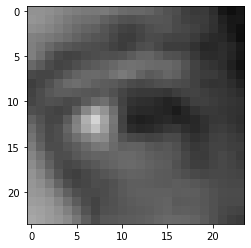

1


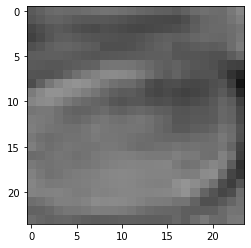

1


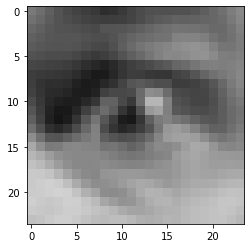

0


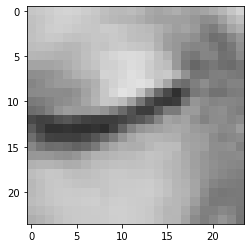

1


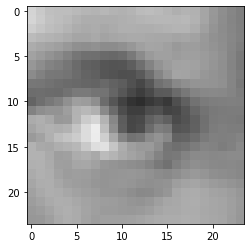

0


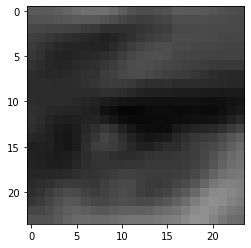

0


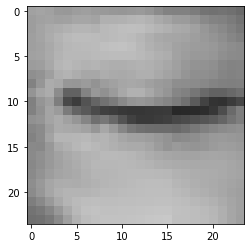

1


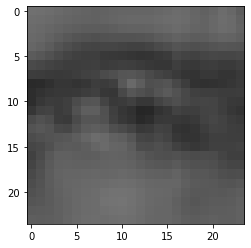

1


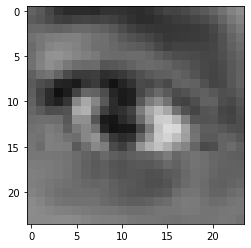

1


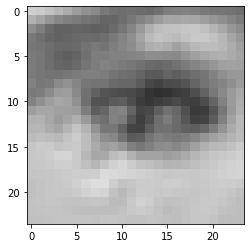

0


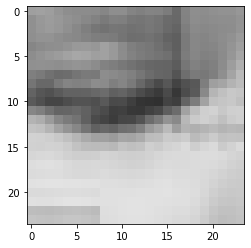

1


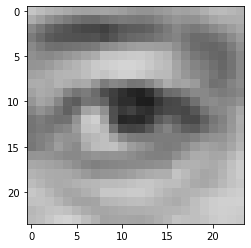

In [26]:
k = 0
from pathlib import Path
for image in sorted(Path('../dev/').iterdir()):
    print(openEyeCheck('../dev/'+image.name))
    plt.imshow(cv.imread('../dev/'+image.name))
    plt.show()
    if k>10:
        break
    k +=1